<a href="https://colab.research.google.com/github/HyunMooKim/Deep-learning_from-the-bottom/blob/main/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>밑바닥부터 시작하는 딥러닝 1 </h1>

# 2장 퍼셉트론
AND, OR, NAND, XOR
등 가장 기본적 논리구조를 표현하는 방식

 W.dot(x) + b 형태는 SVM 의 손실함수와 비슷한 형태


In [ ]:
# 퍼셉트론
import numpy as np

# np.array() 는 리스트를 받아서 배열로 만들어준다.
# np.sum()은 모든 원소의 총합을 구한다.
# 가중치 w는 각 신호의 영향력을, bias 편향력은 얼마나 쉽게 퍼셉트론이 활성화되는지를 나타낸다.

def AND(x1,x2):
  x = np.array([x1,x2])
  w = np.array([0.5,0.5])
  b = -0.7   # 0.5 하나론 못넘고, 두개로는 넘어야함.
  tmp = np.sum(w*x)  + b
  if tmp <= 0:
    return 0
  else:
    return 1

def NAND(x1,x2):
  x = np.array([x1,x2])
  w = np.array([-0.5, -0.5]) #AND에 bias와 가중치 부호 반대로 하면 된다.
  b =  0.7
  tmp = np.sum(w*x)  + b
  if tmp <= 0:
    return 0
  else:
    return 1

def OR(x1,x2):
  x = np.array([x1,x2])
  w = np.array([0.5,0.5])
  b = -0.2  #0.5 하나만으로도 넘을 수 있어야 한다.
  tmp = np.sum(w*x)  + b
  if tmp <= 0:
    return 0
  else:
    return 1

#퍼셉트론으로 XOR 게이트를 표현할 수 없다. 비선형 영역이기 때문이다. 즉,  x,y, 좌표에서 선 하나만 그어서 구분하는 문제만 가능
#다층 퍼셉트론으로 표현한다. ]
#NAND로 둘 다인 경우 제외, OR로 둘 다 아닌 경우 제외 이 둘을 AND로 묶어 XOR을 만들어 낸다.
def XOR(x1,x2):
  s1 = NAND(x1,x2)
  s2 = OR(x1,x2)
  y = AND(s1,s2)
  return y

print(XOR(0,0))
print(XOR(1,0))
print(XOR(0,1))
print(XOR(1,1))

0
1
1
0


# 3장 신경망
퍼셉트론과 신경망의 차이점은, 퍼셉트론은 활성화를 0보다 크거나 작은 경우 2가지로 계단식함수를 이용.

반면 신경망은 시그모이드 함수 e^x /(1 + e^x)  = 1/(1+e^-x) 를 이용 

https://gooopy.tistory.com/52

[False  True  True]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<ipython-input-22-5e9a4e0001ff>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x>0, dtype=np.int )


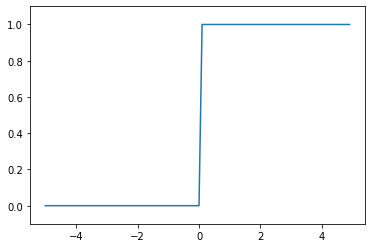

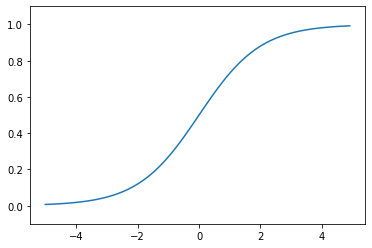

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-1.0, 1.0, 2.0])
y = x > 0
print(y)
# 이렇게 배열에 대하여 부등호 연산을 하면 boolean값이 되는 점을 이용해 계단식 함수에 인자로 배열을 전달할 수 있게 개조

def step_function(x):
  return np.array(x>0, dtype=np.int )

x = np.arange(-5.0, 5.0, 0.1)
print(step_function(x))
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()


def sigmoid(x):
  return 1/(1+np.exp(-x))

y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

이렇게 매끄러워진 함수가 신경망 학습에서 아주 중요한 역할을 하게 된다.

1과 0만 반환하는 계단 함수대신 소수를 반환하여 연속적인 실수가 흐르게 된다.

최근에는 0이 넘으면 출력하고 0 이하면 0을 출력하는 ReLu 함수를 이용한다.

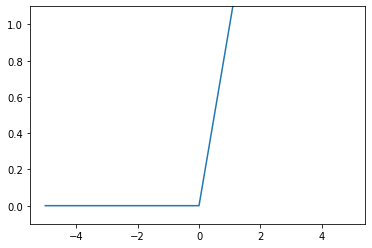

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def Relu(x):
  return np.maximum(0,x)

x = np.arange(-5.0, 5.0, 0.1)
y = Relu(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

# 3장 행렬

In [ ]:
import numpy as np

A=np.array([[1,2,3],[4,5,6]])
B= np.array([ [1,2],[3,4],[5,6] ])
print('A',A)
print()
print('B',B)
#차원
print('\n차원',np.ndim(B))
#모양
print('\n모양',B.shape)
print()
#행렬곱
print(np.dot(A,B))

A [[1 2 3]
 [4 5 6]]

B [[1 2]
 [3 4]
 [5 6]]

차원 2

모양 (3, 2)

[[22 28]
 [49 64]]


# 3장 - 3층 시그모이드 신경망 구현

<img src='https://ifh.cc/g/7MZLl1.jpg' border='0'></a>


In [ ]:
import numpy as np
def sigmoid(x):
  return 1/(1+np.exp(-x))

def identity_function(x):
  return x

def init_network():
  network={}
  #0층에서 1층(노드 2개 -> 3개)
  network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
  network['b1'] = np.array([0.1,0.2,0.3])

  #1층에서 2층(노드3개->2개)
  network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3, 0.6]])
  network['b2'] = np.array([0.1,0.2])

  #2층에서 3층(노드2개->2개)
  network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
  network['b3'] = np.array([0.1,0.2])

  return network

def forward(network, x):
  W1,W2,W3 = network['W1'], network['W2'], network['W3']
  b1,b2,b3 = network['b1'], network['b2'], network['b3']

  a1=np.dot(x,W1) +b1
  z1 = sigmoid(a1)
  a2=np.dot(z1,W2) +b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)
  
  return y

network=init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


#Soft MAX
세 개 이상의 class로 나뉠 경우, 각 class 에 속할 확률

설명: https://wikidocs.net/35476 <- 여기 좋습니다. <br> 
      https://bookandmed.tistory.com/39 

In [ ]:
import numpy as np
#각 점수
a = np.array([0.3, 2.9, 4.0])

#e의 x제곱
exp_a = np.exp(a)

#분모
sum_exp_a = np.sum(exp_a)

#각 클래스로 분류될 확률
y = exp_a / sum_exp_a

print(y)

#함수화

def softmax(a):
  exp_a=np.exp(a)
  sum = np.sum(exp_a)
  y = exp_a / sum
  return y

[0.01821127 0.24519181 0.73659691]


In [ ]:
# 이때, e의 제곱을 이용하면 오버플로우가 발생할 수 있다.
# 이 문제를 해결하기 위해 계산해야할 점수의 최댓값을 모든 점수에 빼주어 상대적 크기 차이만 이용할 수 있다.
# page 93을 보면, exp() 함수 안에 상수를 더하거나 빼주어도 값이 변하지 않음을 증명한다.

import numpy as np

def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c) #overflow 방지
  sum = np.sum(exp_a)
  y = exp_a / sum
  return y

a = np.array([1010,1000,990])
result =  softmax(a)
print(result)
print(np.sum(result))

[9.99954600e-01 4.53978686e-05 2.06106005e-09]
1.0


# 3장 손글씨 숫자 인식

#아래 두개 셀을 실행해 데이터 가져와야 뒤에 것들도 가능

In [ ]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 830, done.
remote: Total 830 (delta 0), reused 0 (delta 0), pack-reused 830
Receiving objects: 100% (830/830), 52.21 MiB | 11.49 MiB/s, done.
Resolving deltas: 100% (477/477), done.


In [ ]:
# 데이터 가져오기
import sys, os 
from deep.dataset import mnist
''' 
완전 처음 할 때 
1. git허브에서 가져오기
2. sys.path에 내가 쓸 파일 추가하기
3. 폴더 이름을 deep으로 바꾸기( - 나 from 때문에 문법오류난다)
4. from 바꾼 폴더이름 import 내가 쓸 함수 파일이름
'''
# 훈련 이미지 6만장, test이미지 만장 

# sys.path.append('/content/deep-learning-from-scratch/dataset/mnist.py')
# print(sys.path)


# https://raw.githubusercontent.com/WegraLee/deep-learning-from-scratch/master/dataset/mnist.py
# https://github.com/WegraLee/deep-learning-from-scratch.git 

#x_train은 이미지, t_train은 라벨
(x_train, t_train), (x_test, t_test) = mnist.load_mnist(flatten=True, normalize=False)
print(x_train.shape) #60000, 784 나오면 성공

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)


5
(784,)
(28, 28)


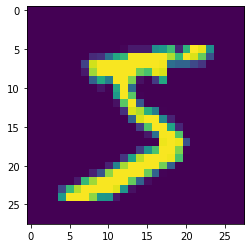

In [ ]:
#이미지 열어보기
import sys, os
import numpy as np
from PIL import Image
from deep.dataset import mnist
from matplotlib.pyplot import imshow 

def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  imshow(pil_img)

(x_train, t_train), (x_test, t_test) = mnist.load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label) #5

print(img.shape) # (784, )
img = img.reshape(28, 28) 
# 원래 이미지의 모양으로 변형 flastten=True 1차원 배열로 저장되어있기 때문에, 28*28로 다시 바꾸는 것
print(img.shape)  #(28,28)

img_show(img)

In [ ]:
# 신경망 구현하기
# 28*28 크기의 이미지가 input, 0~9의 숫자가 output
import os, sys
import pickle
# sys.path.append('/content/deep-learning-from-scratch/ch03/sample_weight.pkl')
# from deep.ch03 import sample_weight 왜인지 .py와 다르게 .pkl은 이렇게 import할 수 없었다 
# 대신 실제 경로를 이용해 사용할 수 있었다. /content/deep/ch03/sample_weight.pkl

from deep.dataset import mnist
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))
  
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c) #overflow 방지를 위해 최대값을 다 빼준다. 결과는 변하지 않는다.
  sum = np.sum(exp_a)
  y = exp_a / sum
  return y

def get_data():
  #normalize정규화(0~255의 픽셀 값을 0~1 범위로 정규화) 이걸 안하니까 sigmoid에서 runtime error발생
  (x_train, t_train), (x_test, t_test) = mnist.load_mnist(flatten=True, normalize=True, one_hot_label=False) #정답만 1, 나머진 0으로 표시하는 원 핫
  return x_test, t_test

def init_network(): # 가중치와 매개변수가 주어졌다! 딕셔너리로 저장되어있는 이진파일. 최적의 가중치를 찾아내는게 딥러닝
  with open("/content/deep/ch03/sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)
    return network

#          X            W1          W2            W3          ->        Y
#   test개수 x 784   784 x 50    50 x 100    100 x 분류개수     test개수 x 분류개수
def predict(network,x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']
  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1,W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2,W3) + b3
  y = softmax(a3)
  return y

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in  range(len(x)): #test는 10000개
  y = predict(network, x[i])
  p = np.argmax(y)  #확률이 가장 높은 인덱스 저장
  if (p == t[i]):
    accuracy_cnt += 1

print('sigmoid 함수, softmax방식 이용한 정확도:', float(accuracy_cnt) / len(x) ) #0.9352가 나와야 정상

sigmoid 함수, softmax방식 이용한 정확도: 0.9352


In [ ]:
#batch 묶음 - x[i] y[i] 에 각각 i번째 이미지와 그 결과가 저장되어 있다.
#묶음을 이용해 계산한다. 컴퓨터는 큰 배열을 한번에 계산하는 것이 분할된 배열을 여러번 하는 것보다 빠르다.
batch_size = 100
accuracy_cnt = 0
for i in range(0,len(x), batch_size): 
  x_batch = x[i:i+batch_size] # 100개의 행, 100개의 test 
  y_batch = predict(network,x_batch) 
  p = np.argmax(y_batch, axis=1 ) #100개 단위니까 열따라 이동(행으로) 100번, 최대치 index
  accuracy_cnt +=np.sum( p == t[i:i+batch_size] )  #정답이 맞는 개수만큼 sum
print( float(accuracy_cnt) / len(x) )

0.9352


# 4장 신경망 학습 - 수치 미분

직선으로 분리할 수 있는 선형 분리 가능 문제는 퍼셉트론 수렴정리에 의해 유한 번의 학습을 통해 풀 수 있다.
하지만 비선형 분리 문제는 자동으로 학습할 수 없다.<br>

사람이 생각한 특징 -> 기계학습 -> 결과<br>
딥러닝 -> 결과 (사람의 개입 최소화)<br><br>

'특징'은 보통 SITF, SURF, HOG 등의 특징을 이용해 벡터로 기술하고, 이후 지도 학습 분류 기법 SVM KNN 등으로 학습할 수 있다.

정확도가 아닌 손실을 지표로 하는 이유: <br>
정확도를 지표로 삼으면 대부분의 매개변수 미분 값이 0으로, 갱신을 하기가 어려워진다. (정확도 32%라면 가중치가 조금 바뀌어도 그대로 32%일 수 있다. 반면 손실함수는 조금의 변화에도 바뀌는 연속적인 변화!)

이는 계단식 함수 대신 시그모이드 같은 함수를 이용하는 이유이기도 하다. 

In [ ]:
# 손실 측정 - 오차 제곱의 합
import numpy as np
#SSE 오차 제곱의 합
def sum_squares_error(y, t):
  return 0.5 * np.sum((y-t)**2)

#정답은 2
t= [0,0,1,0,0,0,0,0,0,0]

# 2일 확률이 가장 높다고 예측
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print('정답 2를 맞춘 경우 손실',sum_squares_error(np.array(y),np.array(t)) )

# 7일 확률이 가장 높다고 예측
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print('틀린 경우 손실', sum_squares_error(np.array(y),np.array(t)) )


정답 2를 맞춘 경우 손실 0.09750000000000003
틀린 경우 손실 0.5975


In [ ]:
# 손실 측정 - 교차 엔트로피 오차
# 로그 씌워서 파악, 정답 인덱스의 점수가 1에 가까울 수록 0에 가까운 손실 발생
import numpy as np

# (1/N) * -시그마log(y) 
# 원핫 코딩으로 인해, 정답 인덱스가 아닌 부분은 다 0이 된다. 따라서 데이터가 하나면 추론 결과값의 -log 값이 된다.
# 예를들어 2 가 정답이고 그 확률이 0.6인 경우 -log 0.6 이다. 값이 음수니까 앞에 - 부호를 붙여준 것.

def cross_entropy_error(y,t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))
  # 아주 작은 델타를 더해줘 np.log에 0이 입력되어 -inf가 되지 않도록 함.

#정답은 2
t= [0,0,1,0,0,0,0,0,0,0]

# 2일 확률이 가장 높다고 예측
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
# - (log 6 - log 10)
print('정답 2를 맞춘 경우 손실',cross_entropy_error(np.array(y),np.array(t)) )


# 7일 확률이 가장 높다고 예측
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print('틀린 경우 손실', cross_entropy_error(np.array(y),np.array(t)) )
# - (log5 - log100) 

정답 2를 맞춘 경우 손실 0.510825457099338
틀린 경우 손실 2.302584092994546


In [ ]:
#학습 데이터 중 무작위 일부만을 이용할 수도 있다. mini-batch 학습이라고 한다.
import numpy as np
from deep.dataset import mnist
(x_train, t_train), (x_test, t_test) = mnist.load_mnist(normalize=True, one_hot_label=True)

train_size = x_train.shape[0] #6만
batch_size = 10
# 0 이상 6만 미만의 수 중 무작위 10개 선택 ->배열로 나옴
batch_mask = np.random.choice(train_size, batch_size)

# 무작위로 뽑힌 배열을 이용해 원하는 만큼의 데이터와 정답을 가져온다.
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

#이렇게 뽑은 mini-batch로 손실함수를 계산하면 적은 수를 이용할 수 있다.
#위에서 구현한 데이터가 하나인 경우와 batch로 묶여 들어오는 경우 모두에 쓸 수 있도록
def cross_entropy_error_mini_batch(y,t):
  if (y.ndim ==1):
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)
  batch_size = y.shape[0]
  # 아주 작은 델타를 더해줘 np.log에 0이 입력되어 -inf가 되지 않도록 함.
  return -np.sum(t * np.log(y+1e-7)) / batch_size

#만약 one hot incoding이 아니라 '2', '7' 등 정답 인덱스인 경우
def cross_entropy_error_no_one_hot(y,t):
  if (y.ndim ==1):
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)
  batch_size = y.shape[0]
  #np.arange( 숫자 ) 는 0부터 숫자 -1 까지의 배열을 반환한다.
  #y[np.arange(batch_size),t] 는 모든 행에 대한 정답 열을 의미한다.
  return -np.sum(t * np.log(y[np.arange(batch_size),t]+1e-7  )) / batch_size   

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


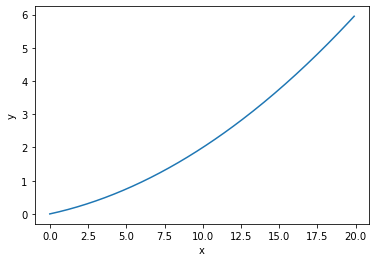

5에서 미분:  0.1999999999990898
10에서 미분:  0.2999999999986347


In [ ]:
# 학습을 위한 미분

import numpy as np
import matplotlib.pyplot as plt

def function_1(x):
  return 0.01*x**2 + 0.1*x
  
def numerical_diff(f,x):
  h = 1e-4 #10의 -4제곱! 너무 작게 하면 0으로 인식하는 문제 발생 이정도가 좋다고 알려져있다
  return ( f(x+h) - f(x-h) ) / (2*h)    #h를 0으로 무한히 좁히는 것이 불가능하므로, x에서 앞뒤로 h만큼 이동한 실제 미분과 다른 근사치
  
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y)
plt.show()

print('5에서 미분: ', numerical_diff(function_1, 5))
print('10에서 미분: ', numerical_diff(function_1, 10) )

In [ ]:
# gradient - 편미분 값을 벡터로 정리한 것
# 변수 x 역시 배열 형태로 x = [x1,x2]
def function_2(x):
  return x[0]**2 + x[1]**2 

# 함수와 변수 값들을 받아 미분값 반환
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x) #x와 형상이 같은 배열 생성
  
  # 변수 개수 만큼 반복문이 돌아야 하는데, 한번만 도는 문제 발생.. -> return 들여쓰기 문제였음
  for idx in range(x.size):
    tmp_val = x[idx]
    #각 변수에 대하여 x+h, x-h 계산
    x[idx] = tmp_val + h 
    fxh1 = f(x)
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)

    #원래 값으로 복원
    x[idx] = tmp_val 

  return grad


print('3차원(2변수 함수) 미분',numerical_gradient( function_2, np.array([3.0, 4.0]) )  )
print('3차원(2변수 함수) 미분',numerical_gradient( function_2, np.array([0.0, 2.0]) )  )
print('3차원(2변수 함수) 미분',numerical_gradient( function_2, np.array([3.0, 0.0]) )  )

3차원(2변수 함수) 미분 [6. 8.]
3차원(2변수 함수) 미분 [0. 4.]
3차원(2변수 함수) 미분 [6. 0.]


이렇게 미분값들을 구해 복잡한 함수에서 최소(혹은 최대)값을 향해 조금씩 이동하며 기울기가 0이 되는 최저점을 찾으려는 방법을 경사 하강법 이라고 한다.<br>
그러나 실제 복잡한 현실문제에서는 안정점이 최솟값이 아닐수도 있고, 평평한 곳으로 가면서 고원(플래토)라고 하는 학습이 진행되지 않는 정체기에 빠질 수 있다.

In [ ]:
# 경사법으로 x1^2 + x2^2 의 최솟값 구하기
def function_2(x):
  return x[0]**2 + x[1]**2 

def gradient_descent(f, init_x, lr, step_num):
  x = init_x
  for i in range(step_num):
    grad = numerical_gradient(f,x)
    #원하는 기울기일때만 움직여야 하지 않나? 
    x = x - lr*grad
  return x

init_x = np.array([-3.0, 4.0])

# 실제 최솟값 0과 아주 비슷 ! 학습률이 너무 크거나 작으면 동떨어진 값이 나온다. (너무 크게 크게 이동하며 찾기 때문)
gradient_descent(function_2, init_x = init_x, lr= 0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

학습률 처럼 사람이 직접 여러 후보 중 결정해야 하는 가중치를 hyper parameter라고 한다.

In [ ]:
# 신경망에서의 기울기
import numpy as np
# !git clone 하고, deep으로 바꾸는 것 잊지 말고!
from deep.common.functions import softmax, cross_entropy_error
from deep.common.gradient import numerical_gradient

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3) #정규 분포로 초기화
  def predict(self, x):
    return np.dot(x, self.W) 
  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)
    return loss


# 하나의 신경망 만들기
net = simpleNet()
print('created Neural Network\n',net.W)

# 초기값 설정 및 예측
x = np.array([0.6, 0.9])
p = net.predict(x)
print('predict \n',p)

t = np.array([0, 0, 1]) # 정답 레이블 설정

print('compare with the answer loss is: ',net.loss(x, t))


# 함수를 손실함수로 정의
def f(W):
  return net.loss(x,t)
# f = lambda w: net.loss(x,t) 로도 가능

# 함수와 값을 받아 미분
dW = numerical_gradient(f, net.W)
print(dW)

created Neural Network
 [[ 0.66000002  0.54932187 -2.37743454]
 [ 0.57481429  0.3864953   1.51500164]]
predict 
 [ 0.91333288  0.67743889 -0.06295925]
compare with the answer loss is:  1.749436680490603
[[ 0.27693531  0.21874135 -0.49567666]
 [ 0.41540297  0.32811202 -0.74351499]]


딥러닝 프레임워크 중 SGD (stochastic gradient descent) 방법이 있다.
이는 

1. 미니배치 무작위 선택
2. 기울기 산출
3. 매개 변수 갱신 

의 3단계를 반복하는 함수이다.
즉, 복잡한 매개변수 공간에서(아주 큰 n차원) 기울어진 방향으로 매개변수 값을 갱신하는 일을 몇 번이고 반복하는 단순한 방법.

In [ ]:
#2층 신경망 클래스 구현
import numpy as np
# !git clone 하고, deep으로 바꾸는 것 잊지 말고!
from deep.common.functions import softmax, cross_entropy_error
from deep.common.gradient import numerical_gradient
from deep.dataset.mnist import load_mnist




def sigmoid(x):
  return 1/(1+np.exp(-x))


# 0층 input -> 1층 hidden -> 2층 output
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
  # 가중치 초기화 , 정규분포를 따르는 난수로 가중치 초기화, 0으로 편향 초기화
    self.params = {} #create a dictionary
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)
    return y
        

    # x:입력 데이터, t:정답 레이블
  def loss(self, x, t):
    y = self.predict(x)
    return cross_entropy_error(y, t)
    
  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)
        
    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)
        
    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
    return grads
 
    '''       
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
   '''


# 미니배치 학습 구현
(x_train, t_trian), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True )

train_loss_list = []

# hyper parameter
iters_num = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

#input 이미지(28*28) ouput 0~9 숫자 
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
  print(i)
  # mini batch   0~60000 중 100개
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]
  # 기울기 계산
  grad = network.numerical_gradient(x_batch, t_batch)


  # 매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  #학습 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

0
1
2
3
4
5
6
7
8
9


In [ ]:
#학습이 진행됨에 따라 손실이 줄었을까? 
#100 번하고 싶지만, 너무 오래걸린다.
print(train_loss_list)

[2.2925339361755603, 2.297691859885353, 2.292977378646004, 2.2921516495310588, 2.2714990688594807, 2.292138527937061, 2.3081221835024244, 2.298603896867228, 2.2930658991085537, 2.2746945609797176]


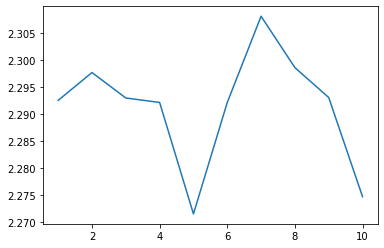

In [ ]:
import matplotlib.pyplot as plt
# 손실이 줄었는지 확인  - 안 줄었다?? 
# 1바퀴에 1분 걸려서 더 못하겠다. 
# 알고 보니 뒤에 나오는 오차역전파법이 훨씬 빠르다. 책에서도 그 방법을 이용해 그림을 그렸을듯.
plt.plot( range(1,iters_num+1)  , train_loss_list)

In [ ]:
# epoch - 훈련 데이터만큼 학습 했을 때의 단위이다.
# 즉, 6만 개 사진을 100 미니배치씩 했다면, 600회가 1에폭이다.
# 과적합을 막기 위해, 1 epoch이 될때마다 test데이터와 train데이터 정확도를 비교하여 과적합 발생 시점을 찾을 수 있다.

#위의 코드와 달라진 점만 보면 된다.

import numpy as np
# !git clone 하고, deep으로 바꾸는 것 잊지 말고!
from deep.common.functions import softmax, cross_entropy_error, sigmoid
from deep.common.gradient import numerical_gradient
from deep.dataset.mnist import load_mnist

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    self.params = {} #create a dictionary
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)
    return y
        
  def loss(self, x, t):
    y = self.predict(x)
    return cross_entropy_error(y, t)
    
  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)
        
    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)
        
    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
    return grads
 

(x_train, t_trian), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True )
train_loss_list = []

iters_num = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

##########################달라진곳############################
train_acc_list = []
test_acc_list = []
iter_per_epoch = max(train_size / batch_size, 1)
##########################-----############################

for i in range(iters_num):
  print(i,'번째 학습중')
  # mini batch   0~60000 중 100개
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]
  # 기울기 계산
  grad = network.numerical_gradient(x_batch, t_batch)

  # 매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  #학습 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  ##########################달라진곳############################
  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc | " + str(train_acc) +"," + str(test_acc) )
  ##########################-----############################
  # 너무 오래 걸리는 관계로.... 

0 번째 학습중
train acc, test acc | 0.10441666666666667,0.1028
1 번째 학습중
2 번째 학습중
3 번째 학습중
4 번째 학습중
5 번째 학습중
6 번째 학습중
7 번째 학습중
8 번째 학습중
9 번째 학습중


#5장 신경망학습 - 오차역전파법  backward propagation
<br>cs231n에 나오는 계산 그래프와 연쇄법칙!
chain rule을 이용해 미분을 빠르게 만들어준다.
위의 방법은 100개 mini-batch를 미분해 갱신하는 데에 1분이 걸렸다.

In [ ]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 826, done.
remote: Total 826 (delta 0), reused 0 (delta 0), pack-reused 826
Receiving objects: 100% (826/826), 52.21 MiB | 19.92 MiB/s, done.
Resolving deltas: 100% (477/477), done.


In [ ]:
# 아주 간단한 사과 구매 계산 그래프 = P * Q * T
# 곱셈 Layer
class MulLayer:
  #self.x,  self.y 는 각 노드마다 따로 만들게 된다.
  def __init__(self):
    self.x = None
    self.y = None
  def forward(self, x, y):
    self.x = x
    self.y = y
    out = x * y
    return out
  # 단순 곱셈이므로 서로가 미분값이 된다. 
  def backward(self, dout):
    dx = dout * self.y
    dy = dout * self.x
    return dx,dy
P = 100
Q = 2
T = 1.1

#계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

#순전파
PQ = mul_apple_layer.forward(P,Q)
Total_Cost = mul_tax_layer.forward(PQ, T)

print(Total_Cost)

#역전파
#첫 시작은 1로 두 곱셈이 서로 미분값, 그 후로는 chain처럼 계속 곱해나간다.
dTotal_Cost = 1
dPQ, dT = mul_tax_layer.backward(dTotal_Cost)
dP, dQ = mul_apple_layer.backward(dPQ)
print(dP,dQ,dT)

220.00000000000003
2.2 110.00000000000001 200


In [ ]:
# sigmoid 노드 구현
import numpy as np

class Sigmoid:
  def __init__(self):
    self.out = None
 
  def forward(self, x):
    out = 1 / (1 + np.exp(-x))
    self.out = out
    return out

 # page 167 ~ 170에 왜 시그모이드의 편미분 chain이 y(1-y) 가 되는지 나온다. 
  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out
    return dx

In [ ]:
#affine 구현 
#위에서 한 계산 그래프를 행렬 단위로 진행.
# common.layers.py에 있는 affine함수 구현은 4차원 데이터까지 가능한 버전

class Affine:
  def __init__(self,W,b):
    self.W = W
    self.b = b
    self.x = None
    self.dw = None
    self.db = None
  def forward(self,x):
    self.x=x
    out = np.dot(x, self.W) + self.b
    return out 
  #스칼라는 아니지만, 어쨋든 곱셈이므로 결국 곱한 상대가 미분값
  def backward(self, dout):
    dx = np.dot(dout,self.W.T)
    self.dW = np.dot(self.x.T, dout)
    #편향은 상수아닌가? 미분값이 있나?
    self.db = np.sum(dout,axis=0)
    return dx

In [ ]:
# soft max with loss 노드 구현

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


class SoftmaxWithLoss:
  def __init__(self):
    self.loss = None #loss
    self.y = None  #softmax 의 출력
    self.t = None  #정답 label(one-hot vector)
  
  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)
    return self.loss
  
  def backward(self, dout=1):
    batch_size = self.t.shape[0]
    dx = (self.y - self.t) / batch_size
    return dx
  


In [ ]:
# 오차역전파법을 적용한 신경망 구현

import numpy as np
from deep.common.gradient import numerical_gradient
# layer.py에 가서 common 앞에 deep넣어주어야함.
from deep.common.layers import *
from collections import OrderedDict

class TwoLayerNet:

  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    self.params = {} #create a dictionary
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  #계층생성 - 순서가 있는 딕셔너리를 이용, 순전파는 순서대로 역전파는 반대로
    self.layers = OrderedDict()
    self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
    self.layers['Relu1'] = Relu()
    self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
    
    self.lastLayer = SoftmaxWithLoss()

  def predict(self, x):
    for layer in self.layers.values():
      x = layer.forward(x)
    return x
  
  def loss(self, x,t):
    y = self.predict()
    return self.lastLayer.forward(y,t)

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    #one hot vector라면 1을 정답 인덱스로
    if t.ndim != 1 : t = np.argmax(t, axis = 1 )
      
    accuracy = np.sum(y==t) / float(x.shape[0])
    return accuracy 

  def gradient(self, x,t ):
    #순전파
    self.loss(x,t)

    #역전파
    dout=1
    dout = self.lastLayer.backward(dout)

    layers=list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout=layer.backward(dout)
    #result
    grads = {}
    grads['W1'] = self.layers['Affine1'].dW
    grads['b1'] = self.layers['Affine1'].db
    grads['W2'] = self.layers['Affine2'].dW
    grads['b2'] = self.layers['Affine2'].db

    return grads
    

In [ ]:
#먼저 했던 수치 미분과 나중해 했던 오차역전파법 중
# 구현이 쉽지만 더 느린 수치 미분은 오차역전파법이 제대로 되었는지 확인할 때 쓰인다.
# 바로 위 코드 돌리고 돌려야함
from deep.dataset.mnist import load_mnist
from deep.ch05.two_layer_net import TwoLayerNet

(x_train, t_trian), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True )

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_trian[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

for key in grad_numerical.keys():
  diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
  print(key + ":" + str(diff))
# 아주 작은 오차면 성공!

W1:4.77772187953562e-10
b1:2.9894537577492648e-09
W2:6.546715693493958e-09
b2:1.3924283003008409e-07


In [ ]:
# 오류가 없었다면, 이제 신경망 학습을 수치 미분이 아니라 오차역전법으로 진행해보자.
# 수치 미분은 아주 오래 걸렸던 것을 기억하라!
from deep.dataset.mnist import load_mnist
from deep.ch05.two_layer_net import TwoLayerNet
import numpy as np


(x_train, t_trian), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True )
train_loss_list = []

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_acc_list = []
test_acc_list = []
iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
  # mini batch   0~60000 중 100개
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]
  ###############4장과 달라진 곳#######################
  # grad = network.numerical_gradient(x_batch, t_batch)
  grad = network.gradient(x_batch, t_batch) 

  # 매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  #학습 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc | " + str(train_acc) +"," + str(test_acc) )

#train acc 와 test acc가 차이가 많이 나면 과적합!

train acc, test acc | 0.08555,0.0851
train acc, test acc | 0.9023833333333333,0.9069


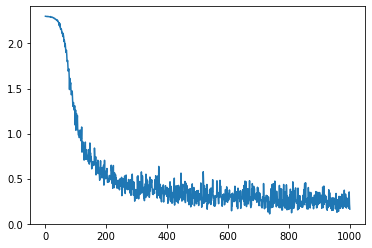

In [ ]:
import matplotlib.pyplot as plt
# 손실이 줄었는지 확인이 된다! 
plt.plot( range(1,iters_num+1)  , train_loss_list)

#6장 학습 관련 기술들

<h4>최적화 방법</h4>
1. 기울기를 계속 갱신하며 최적점을 찾아가는 SDG
<br>-단순한 방법
<br>-가장 가파른 기울기가 가르키는 방향이 최적점과 먼 경우 비효율적
<br><br>
2. momentum 운동량
<br>-이전 갱신의 velocity를 구해 momentum을 곱하여 학습에 더해준다..(첫 V는 0)
<br>- V = momentum * (이전 V) - learning rate * grad
<br>+ 기울기는 V에 - , -기울기는 V에 +
따라서 같은 방향으로 계속 움직이면 일정하게 가속하고, 지그재그 움직임은 가속도가 일정하지 않게 된다. page 196에 더 효율적인 경우가 나온다.
<br><br>
3. AdaGrad
<br>-매개변수가 갱신되어 감에 따라 학습률을 감소 시킨다.
<br>-더 많이 갱신될 수록 더 많이 감소
<br><br>
4. Adam - momentum + AdaGrad
<br><br>
모든 상황에 맞는 뛰어난 기법이란 없다. 상황에 맞게 써야 한다. 

<h4>가중치 초기값으로 인한 기울기 소실문제:</h4>
<bt>
<br>초기값이 너무 크면 시그모이드 함수의 출력이 0과 1에 가까워질 때 그 미분은 0에 다가간다. 따라서 데이터가 0과 1에 치우쳐 분포하게 되면 기울기가 점점 작아지다가 사라진다. 층을 깊게 하는 딥러닝일수록 더 심각한 문제가 될 수 있다.
<br>
1. ReLU 를 이용할 때는, He초깃값을
<br>
2. sigmoid나 tanh 등 S자 모양 곡선일 때는 Xavier를 초깃값으로 하는 것이 모범사례
<br>
3. batch noramization을 이용할 수도 있다.
<br> mini batch 입력데이터를 평균0, 분산 1 인 정규분포로 정규화하여 데이터가 덜 치우지게 만드는 방법.


<h4>Over Fitting</h4>
<br>매게 변수가 많고 복잡한 모델이나 훈련 데이터가 적은 경우 발생 가능
<br>
1. 가중치 감소 방법: W절댓값의 합, 제곱합의 루트 등 정규화 항을 손실 함수에 더하여 과적합 방지. 1/2 入 W^2
2. dropout: 훈련 때 무작위로 노드를 삭제하여 학습하고 test 때는 모든 뉴런에 신호를 전달한다. 단, test 시 각 뉴런의 출력에 훈련 때 삭제 안 한 비율을 곱하여 출력한다. 

<h4>data 나누기</h4>
1. 훈련 데이터: 매개변수 학습
<br>2. 검증 데이터: 하이퍼파라미터 성능 평가
<br>3. 시험 데이터: 신경망의 범용 성능 평가